In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import f1_score

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import statistics
from sklearn import svm
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_precision_recall_curve, roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from keras.datasets import fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
print(y_train[0])

60000
10000
60000
10000
9


In [0]:
dimensions = [10, 50, 200]
epochs = [3] #, 10, 20]

#Redukcja przy użyciu autoenkodera

In [0]:
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import objectives
import numpy as np

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

INITIAL_DIM = 784

def get_autoencoder(dimension):
  # this is the size of our encoded representations

  # this is our input placeholder
  input_img = Input(shape=(INITIAL_DIM,))
  # "encoded" is the encoded representation of the input
  encoded = Dense(dimension, activation='relu')(input_img)
  # "decoded" is the lossy reconstruction of the input
  decoded = Dense(INITIAL_DIM, activation='sigmoid')(encoded)

  # this model maps an input to its reconstruction
  autoencoder = Model(input_img, decoded)
  return autoencoder

In [0]:
def get_encoder(input_img, encoded):
  encoder = Model(input_img, encoded)
  return encoder

In [0]:
# create a placeholder for an encoded input
def get_decoder(encoding_dim):
  encoded_input = Input(shape=(encoding_dim,))
  # retrieve the last layer of the autoencoder model
  decoder_layer = autoencoder.layers[-1]
  # create the decoder model
  decoder = Model(encoded_input, decoder_layer(encoded_input))
  return decoder

In [11]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


NameError: ignored

In [0]:
from keras.datasets import fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [13]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [33]:
datasets = {dim: {ep: (None, None) for ep in epochs} for dim in dimensions}


for di in dimensions:
  for ep in epochs:
    print("EPOCHS: " + str(ep) + " DIM: " + str(di))
    autoencoder = get_autoencoder(dimension=di)
    input_img = Input(shape=(INITIAL_DIM,))
  # "encoded" is the encoded representation of the input
    encoded = Dense(di, activation='relu')(input_img)
    encoder = get_encoder(input_img=input_img, encoded=encoded)
    decoder = get_decoder(encoding_dim=di)
    
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    autoencoder.fit(x_train, x_train,
                epochs=ep,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
  
    reduced_train = encoder.predict(x_train, batch_size=256)
    datasets[di][ep] = (reduced_train, y_train)

EPOCHS: 3 DIM: 10
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 40us/step - loss: 0.5572 - val_loss: 0.4936
Epoch 2/3
60000/60000 [==============================] - 2s 40us/step - loss: 0.4584 - val_loss: 0.4334
Epoch 3/3
60000/60000 [==============================] - 2s 39us/step - loss: 0.4153 - val_loss: 0.4029
EPOCHS: 3 DIM: 50
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 49us/step - loss: 0.5275 - val_loss: 0.4561
Epoch 2/3
60000/60000 [==============================] - 3s 47us/step - loss: 0.4226 - val_loss: 0.4035
Epoch 3/3
60000/60000 [==============================] - 3s 46us/step - loss: 0.3921 - val_loss: 0.3841
EPOCHS: 3 DIM: 200
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 80us/step - loss: 0.4998 - val_loss: 0.4299
Epoch 2/3
60000/60000 [==============================] - 5s 76us/st

In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

9
2
1
1
6
1
4
6
5
7


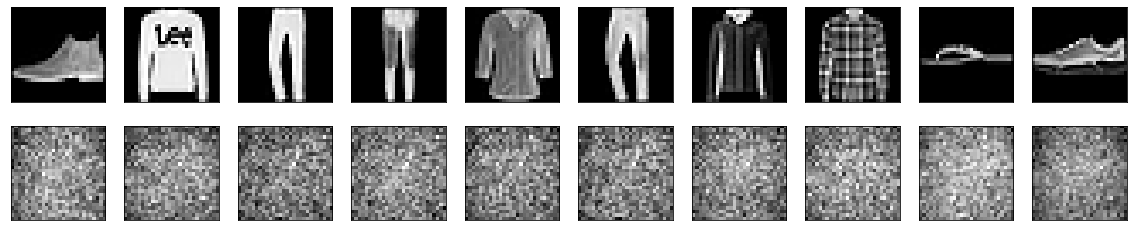

In [35]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    print(y_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Przykładowy wygląd

In [19]:
# size = 10000
# dim = 50

# x_embedded = TSNE(n_components=2).fit_transform(x_pca[size, dim])
# plt.figure(figsize=(15,10))

# for c, ids in zip(mcolors.TABLEAU_COLORS, [str(i) for i in range(dim)]):
#     plt.scatter(x_embedded[y_pca[size] == ids, 0], x_embedded[y_pca[size] == ids, 1], c=c, label=ids)
# plt.legend()
# plt.show()

ValueError: ignored

## AdaBoost

In [124]:
for dim in dimensions:
    for ep in epochs:
      x_train, x_test, y_train, y_test = train_test_split(datasets[dim][ep][0], datasets[dim][ep][1], train_size=0.8)
      classifier = AdaBoostClassifier(n_estimators=10, random_state=7)
      classifier.fit(x_train, y_train)
      print("DIMENSION = {}, EPOCHS = {}, SCORE = {}".format(dim, ep, classifier.score(x_test, y_test)))
    

DIMENSION = 10, EPOCHS = 3, SCORE = 0.3945
DIMENSION = 50, EPOCHS = 3, SCORE = 0.39358333333333334
DIMENSION = 200, EPOCHS = 3, SCORE = 0.43425


### Na oryginalnym 

In [125]:
fmnist = fetch_openml("Fashion-MNIST", data_home="data/fmnist", cache=True)
zipped_fmnist = list(zip(fmnist.data, fmnist.target))

x, y = zip(*(zipped_fmnist))
x = np.asarray(x)
y = np.asarray(y)


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
classifier = AdaBoostClassifier(n_estimators=10, random_state=7)
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

0.49942857142857144

## SVM

In [126]:
for dim in dimensions:
    for ep in epochs:
      x_train, x_test, y_train, y_test = train_test_split(datasets[dim][ep][0], datasets[dim][ep][1], train_size=0.8)
      classifier = svm.SVC()
      classifier.fit(x_train, y_train)
      print("DIMENSION = {}, EPOCHS = {}, SCORE = {}".format(size, dim, classifier.score(x_test, y_test)))
      

SIZE = 10000, DIMENSION = 10, SCORE = 0.8423333333333334
SIZE = 10000, DIMENSION = 50, SCORE = 0.8505833333333334


KeyboardInterrupt: ignored

Na oryginalnym

In [0]:
x, y = zip(*(zipped_fmnist))
x = np.asarray(x)
y = np.asarray(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
classifier = svm.SVC()
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

#Jakość klasyfikatorów

#ROC

In [0]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()



#ROC dla SVM

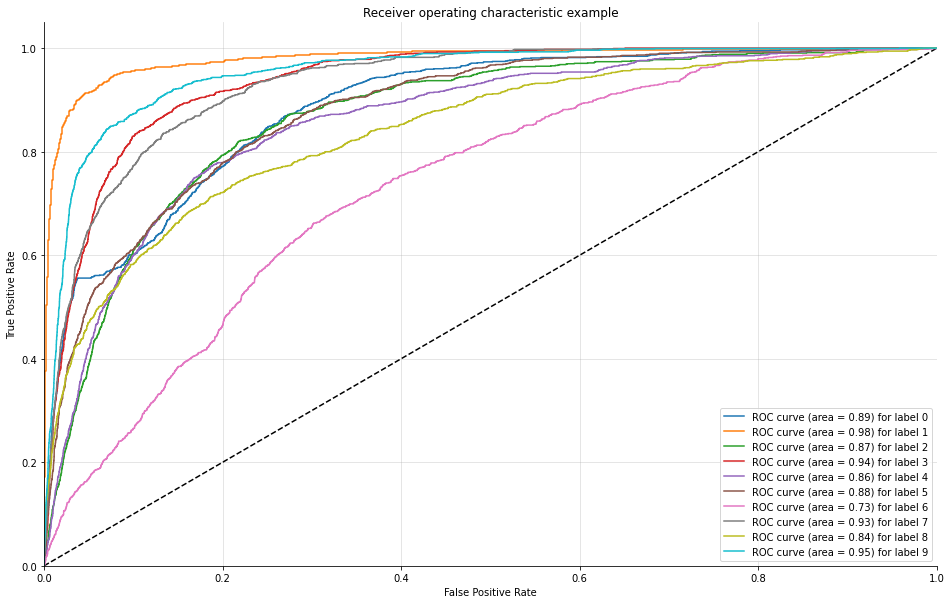

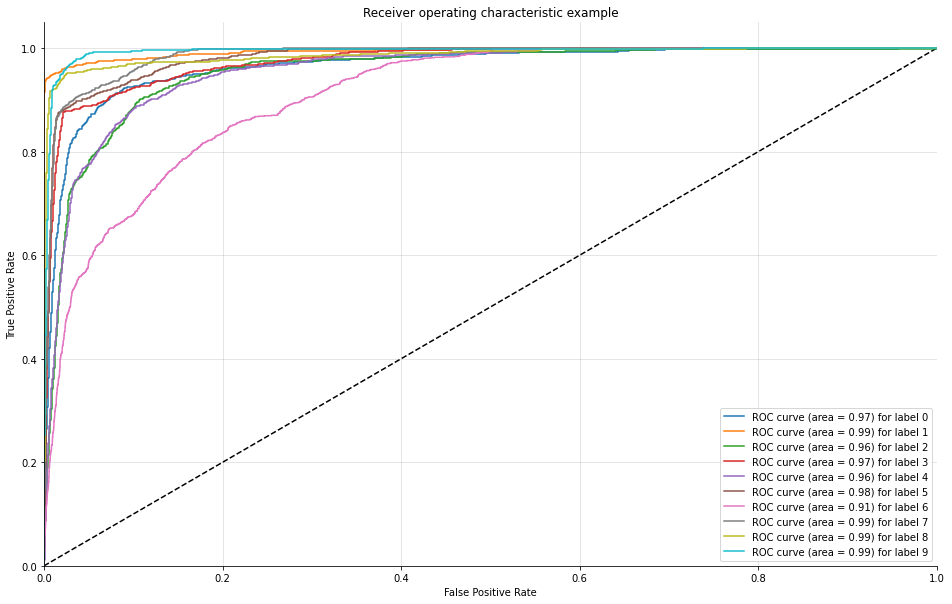

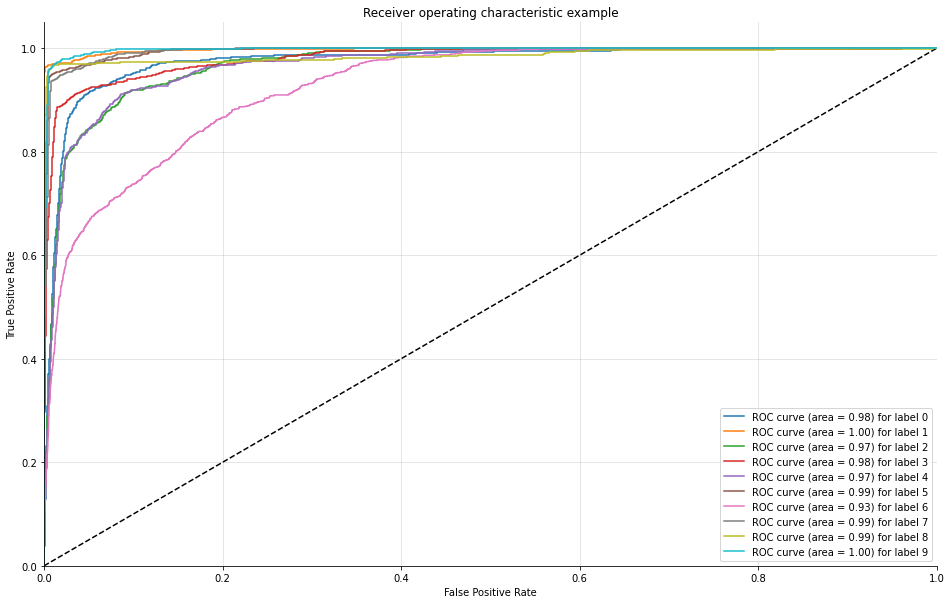

In [39]:
for di in dimensions:
  for ep in epochs:
    x_train, x_test, y_train, y_test = train_test_split(datasets[di][ep][0], datasets[di][ep][1], train_size=0.8)
    classifier = svm.SVC()
    classifier.fit(x_train, y_train)
    plot_multiclass_roc(classifier, x_test, y_test, n_classes=10, figsize=(16, 10))



#ROC dla AdaBoost

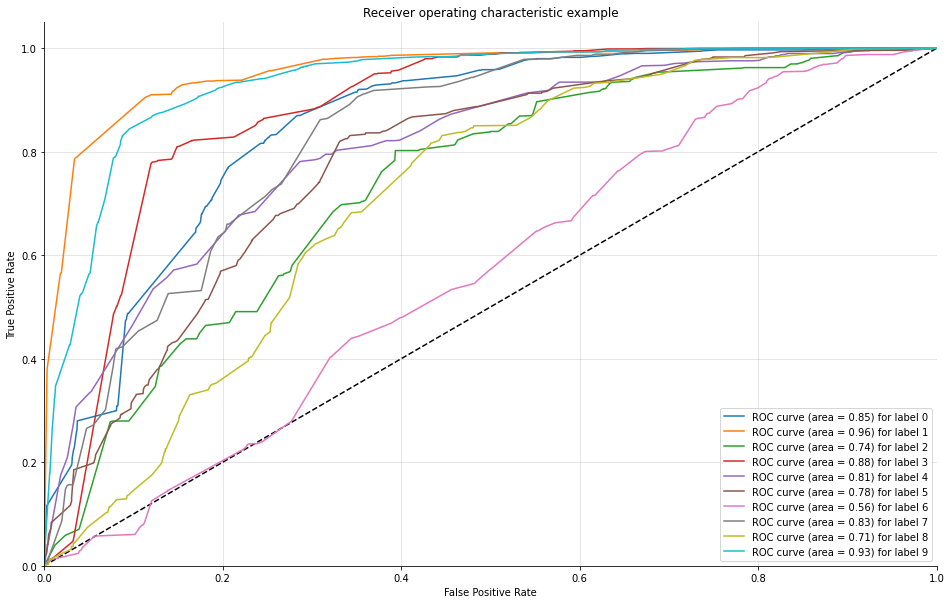

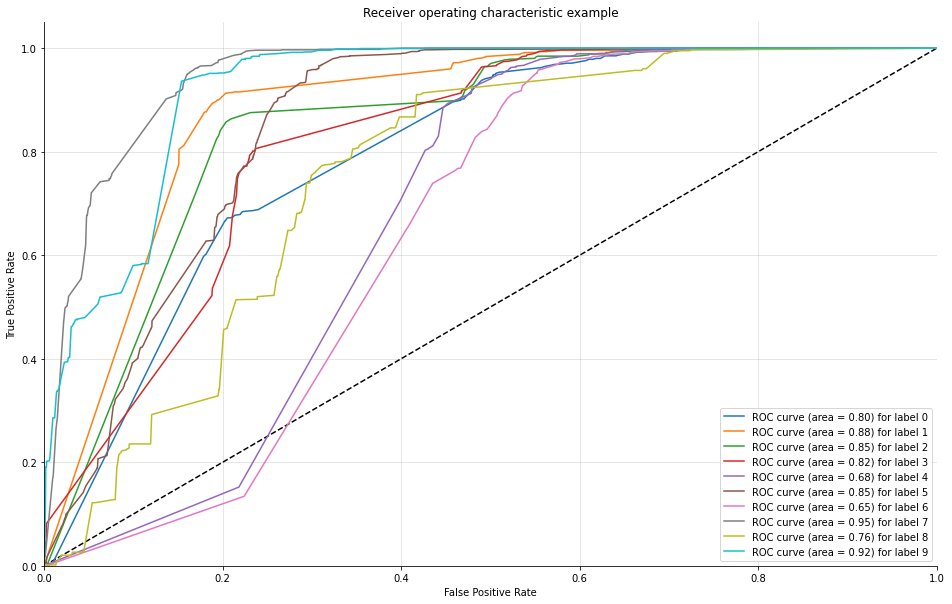

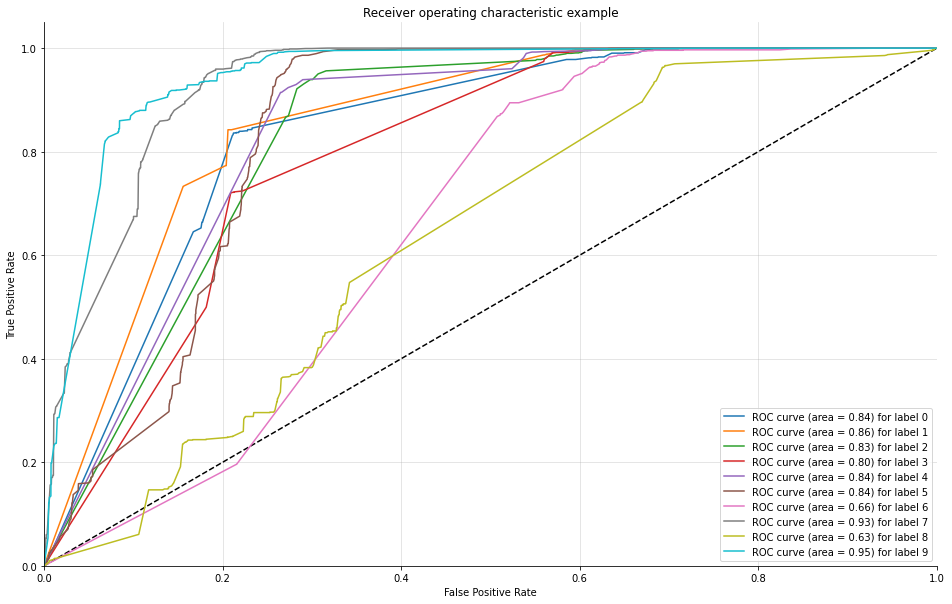

In [38]:
for di in dimensions:
  for ep in epochs:
    x_train, x_test, y_train, y_test = train_test_split(datasets[di][ep][0], datasets[di][ep][1], train_size=0.8)
    classifier = AdaBoostClassifier(n_estimators=10, random_state=7)
    classifier.fit(x_train, y_train)
    plot_multiclass_roc(classifier, x_test, y_test, n_classes=10, figsize=(16, 10))



#Precision Recall

In [0]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_multiclass_pr(clf, X_test, y_test, n_classes, figsize=(16, 10)):
  y_score = clf.decision_function(X_test)
  precision = dict()
  recall = dict()

  y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
  for i in range(n_classes):
      precision[i], recall[i], _ = precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
      plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

  plt.xlabel("recall")
  plt.ylabel("precision")
  plt.legend(loc="best")
  plt.title("precision vs. recall curve")
  plt.show()

#Precision Recall dla SVM

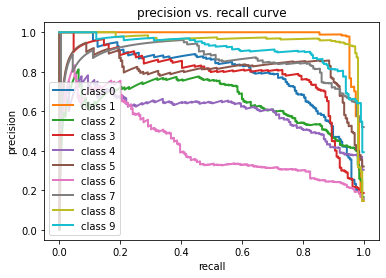

In [0]:
for di in dimensions:
  for ep in epochs:
    x_train, x_test, y_train, y_test = train_test_split(datasets[di][ep][0], datasets[di][ep][1], train_size=0.8)
    classifier = svm.SVC()
    classifier.fit(x_train, y_train)  
    
    plot_multiclass_pr(classifier, x_test, y_test, n_classes=10, figsize=(16, 10))




#plot_multiclass_roc(classifier, x_test, y_test, n_classes=10, figsize=(16, 10))


#Precision Recall dla AdaBoost

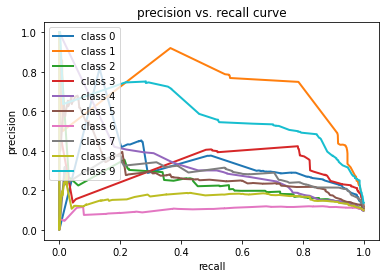

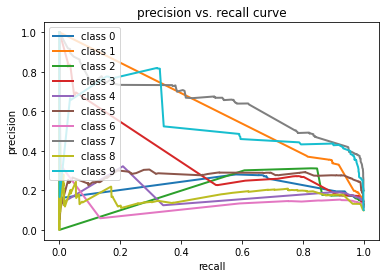

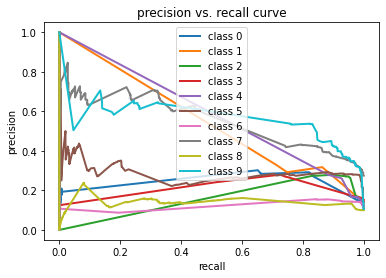

In [41]:
for di in dimensions:
  for ep in epochs:
    x_train, x_test, y_train, y_test = train_test_split(datasets[di][ep][0], datasets[di][ep][1], train_size=0.8)
    classifier = AdaBoostClassifier(n_estimators=10, random_state=7)
    classifier.fit(x_train, y_train)  
    
    plot_multiclass_pr(classifier, x_test, y_test, n_classes=10, figsize=(16, 10))




#Wyniki jakości klasyfikatorów oceniać na bazie krzyżowej-walidacji, (accuracy - Loss-
#błąd, Krzywa ROC, Precision-Recall, (pola pod krzywymi) F1). Dokonać porównania
#wyników tzn: accuracy i loss.

# TODO F1, accuracy i loss

In [43]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

NameError: ignored